# Energy Prices Stock Prices Notebook
---

# Preamble

In [84]:
# import relevant Python libraries
###
import numpy as np  #import numpy 
import pandas as pd #import pandas
from matplotlib import pyplot as plt    #import pyplot from matplotlib
from IPython.display import display, Latex  #import display and Latex from IPython.display
from sklearn import preprocessing as sklpp #import preprocessing from sklearn with alias sklpp
from sklearn import decomposition as skldecomp  #import decomposition from sklearn with alias skldecomp
from sklearn.model_selection import train_test_split #import train_test_split from sklearn.model_selection
import matplotlib.ticker as mticker #import mticker from matplotlib.ticker
from sklearn.model_selection import cross_validate #import cross_val_score from sklearn.model_selection
from sklearn.linear_model import Ridge, Lasso, LinearRegression #import Ridge, Lasso from sklearn.linear_model
import time #import time
from sklearn.metrics import r2_score #import r2_score
###

# **1. Brief Exploration of Dataset**

In [85]:
energy_prices_dataset = pd.read_csv("energy_dataset.csv") #read energy dataset into a csv
print(energy_prices_dataset.head(10)) #print first 10 rows of dataframe just for exploration

                        time  generation biomass  \
0  2015-01-01 00:00:00+01:00               447.0   
1  2015-01-01 01:00:00+01:00               449.0   
2  2015-01-01 02:00:00+01:00               448.0   
3  2015-01-01 03:00:00+01:00               438.0   
4  2015-01-01 04:00:00+01:00               428.0   
5  2015-01-01 05:00:00+01:00               410.0   
6  2015-01-01 06:00:00+01:00               401.0   
7  2015-01-01 07:00:00+01:00               408.0   
8  2015-01-01 08:00:00+01:00               413.0   
9  2015-01-01 09:00:00+01:00               419.0   

   generation fossil brown coal/lignite  generation fossil coal-derived gas  \
0                                 329.0                                 0.0   
1                                 328.0                                 0.0   
2                                 323.0                                 0.0   
3                                 254.0                                 0.0   
4                               

_[The first code cell here is to simply load the energy prices data into a pandas dataframe. Then, I will print the dataframe just to get a feel for what the dataframe contains. ]_

In [86]:
n, p = energy_prices_dataset.shape #get number of rows/columns in dataframe
print(f"Number of Rows in Dataframe: {n}") #number of rows in dataframe
print(f"Number of Columns in data: {p}") #number of columns in dataframe

Number of Rows in Dataframe: 35064
Number of Columns in data: 29


_[To briefly explore this dataset, the first thing I wanted to do was first calculate the total number of rows in my dataframe and the total number of columns in my dataframe. There are a total of 35064 rows in this dataframe. This means that the dataframe contains data across 35064 different hourly points that electrical consumption data was measured. There are 29 columns in the dataframe. 

Time - datetime local to Central European Time (CET)

Generation biomass - Biomass generation in MW

Generation fossil brown coal / lignite - coal/lignite generation in MW

Generation fossil coal-derived gas - coal gas generation in MW

Generation fossil gas - gas generation in MW

Generation fossil hard coal - coal generation in MW

Generation fossil oil - oil generation in MW

Generation fossil oil shale - shale oil generation in MW

Generation fossil peat - peat generation in MW

Generation geothermal - geothermal generation in MW

Generation hydro pumped storage aggregated - hydro1 generation in MW

Generation hydro pumped storage consumption - hydro2 generation in MW

Generation hydro run-of-river and poundage - hydro3 generation in MW

Generation hydro water reservoir - hydro4 generation in MW

Generation marine - sea generation in MW

Generation nuclear - nuclear generation in MW

Generation other - miscellaneous generation in MW

Generation other renewables - miscellaneous renewable generation in MW

Generation solar - solar generation in MW

Generation waste - waste generation in MW

Generation wind offshore - offshore wind generation in MW

Generation wind onshore - onshore wind generation in MW

Forecast solar day ahead - forecasted solar generation by Transmission Service Operator (Red Electric España) in Spain

Forecast wind offshore generation - forecasted offshore wind generation by Transmission Service Operator (Red Electric España) in Spain

Forecast wind onshore generation - forecasted onshore wind generation by Transmission Service Operator (Red Electric España) in Spain

Total load forecast - forecasted total electrical demand by Transmission Service Operator (Red Electric España) in Spain

Total load actual - actual electrical demand

Price a day ahead - forecasted price by Transmission Service Operator (Red Electric España) in Spain 

Price actual - current price as reported by Transmission Service Operator ( Red Electric Espana ) in Spain]_

In [87]:
valuesMissing = energy_prices_dataset.isna().sum().sum() #Compute total number of Cells with Missing Values
print(f"Number of missing values: {valuesMissing}") #print number of cells with missing values

Number of missing values: 70529


_[The next step is to calculate the number of cells with missing values(i.e. empty cells). Unfortunately, our dataset has 70529 missing values]_

In [88]:
#iterate through columns
for column in energy_prices_dataset:
    missingValues = energy_prices_dataset[column].isna().sum() #calculate number of missing values in that column
    if missingValues > 0:
        print(f"The column {column} has {missingValues} missing values")

The column generation biomass has 19 missing values
The column generation fossil brown coal/lignite has 18 missing values
The column generation fossil coal-derived gas has 18 missing values
The column generation fossil gas has 18 missing values
The column generation fossil hard coal has 18 missing values
The column generation fossil oil has 19 missing values
The column generation fossil oil shale has 18 missing values
The column generation fossil peat has 18 missing values
The column generation geothermal has 18 missing values
The column generation hydro pumped storage aggregated has 35064 missing values
The column generation hydro pumped storage consumption has 19 missing values
The column generation hydro run-of-river and poundage has 19 missing values
The column generation hydro water reservoir has 18 missing values
The column generation marine has 19 missing values
The column generation nuclear has 17 missing values
The column generation other has 18 missing values
The column gener

This cell indicates the columns in the dataframe that have missing values. 

The column generation biomass has 19 missing values

The column generation fossil brown coal/lignite has 18 missing values

The column generation fossil coal-derived gas has 18 missing values

The column generation fossil gas has 18 missing values

The column generation fossil hard coal has 18 missing values

The column generation fossil oil has 19 missing values

The column generation fossil oil shale has 18 missing values

The column generation fossil peat has 18 missing values

The column generation geothermal has 18 missing values

The column generation hydro pumped storage aggregated has 35064 missing values

The column generation hydro pumped storage consumption has 19 missing values

The column generation hydro run-of-river and poundage has 19 missing values

The column generation hydro water reservoir has 18 missing values

The column generation marine has 19 missing values

The column generation nuclear has 17 missing values

The column generation other has 18 missing values

The column generation other renewable has 18 missing values

The column generation solar has 18 missing values

The column generation waste has 19 missing values

The column generation wind offshore has 18 missing values

The column generation wind onshore has 18 missing values

The column forecast wind offshore eday ahead has 35064 missing values

The column total load actual has 36 missing values

The column time can not be represented as a histogram


/Users/raviraghavan/opt/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/tools.py:223: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


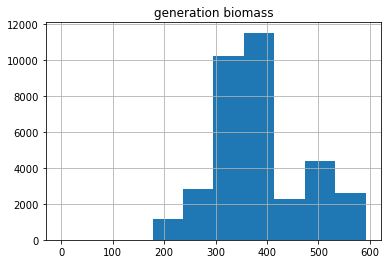

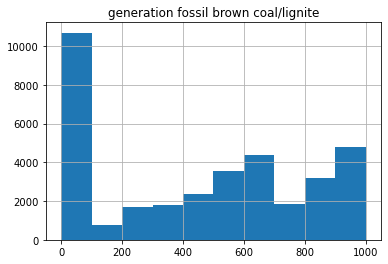

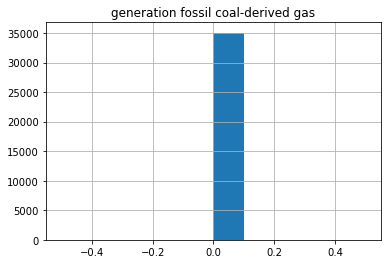

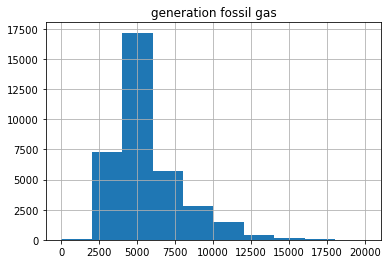

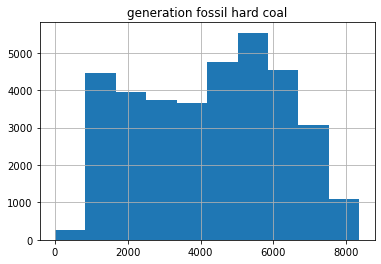

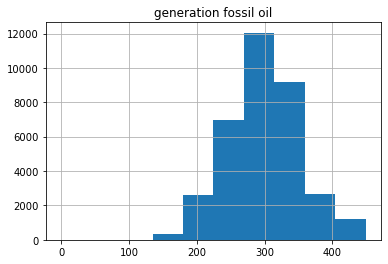

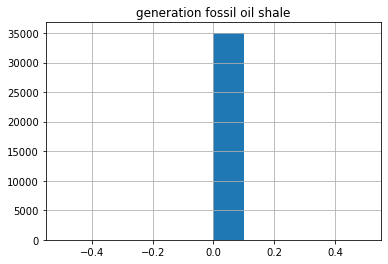

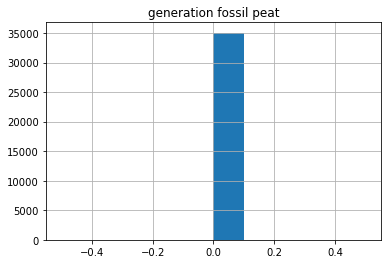

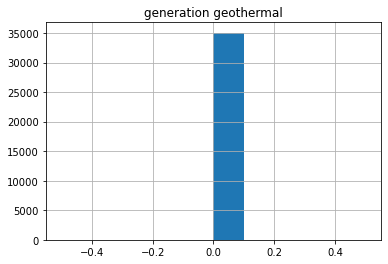

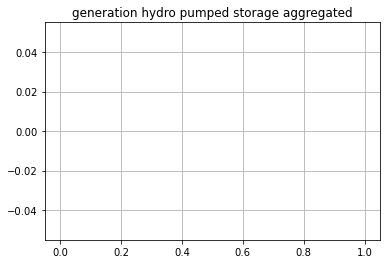

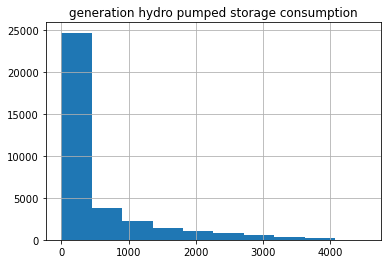

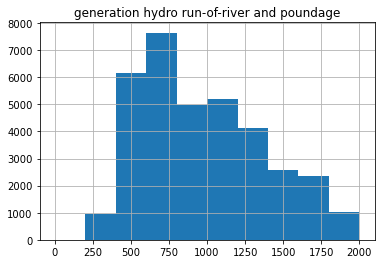

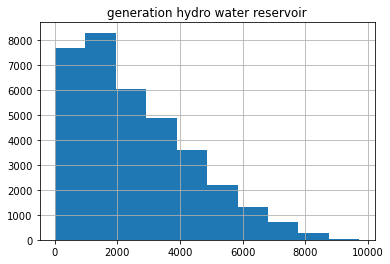

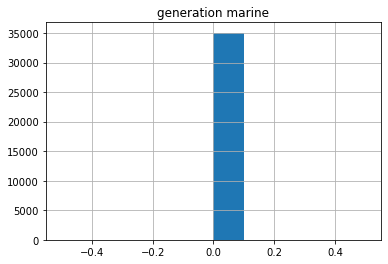

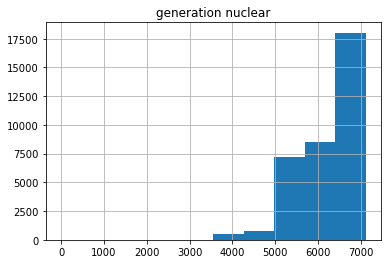

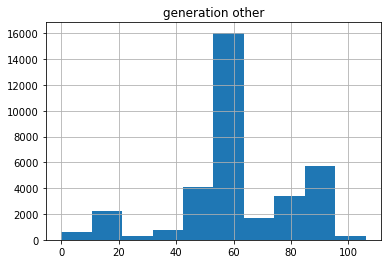

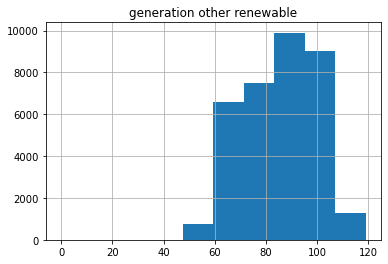

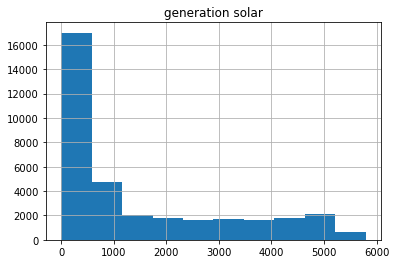

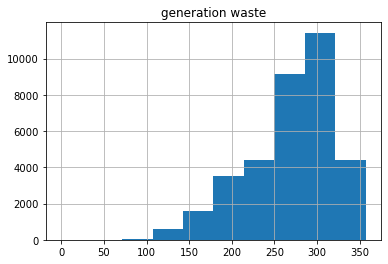

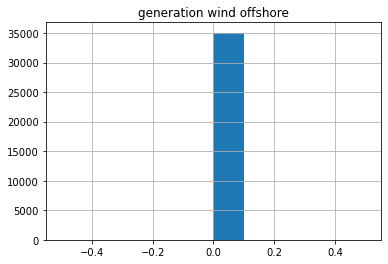

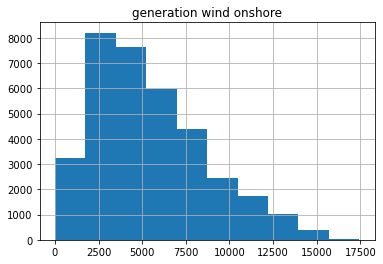

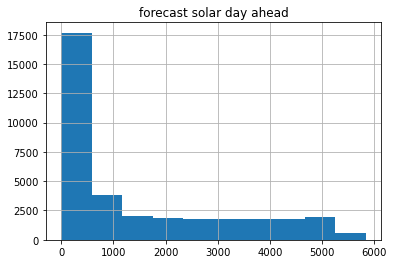

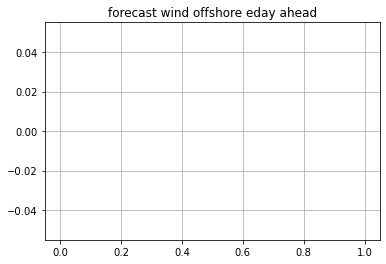

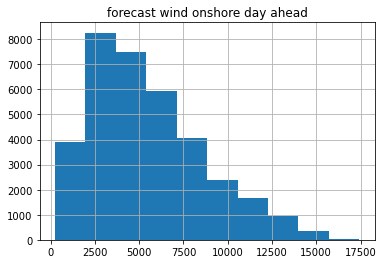

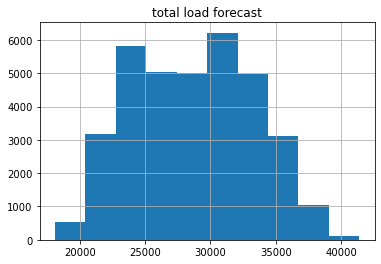

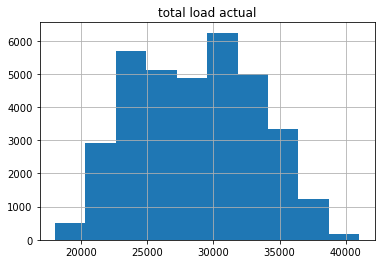

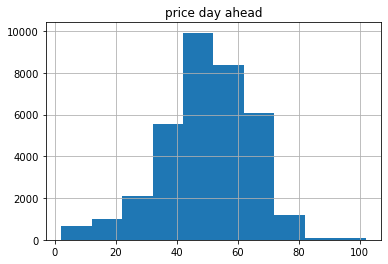

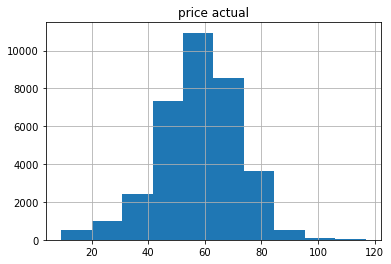

In [89]:
for column in energy_prices_dataset.columns:
    try:      
        energy_prices_dataset[column] = pd.to_numeric(energy_prices_dataset[column]) 
        energy_prices_dataset.hist(column)
    except ValueError:
        print(f"The column {column} can not be represented as a histogram")

These histograms show that all our columns, obviously besides the time column, are supposed to be numerical columns. Hence, I see no need here for one-hot encoding. However, there is something important that must be addressed. As shown by these histograms, the columns "forecast wind offshore eday ahead" and "generation hydro pumped storage aggregated" are entirely empty. Hence, the appropriate thing to do would be to drop these columns when we are pre-processing the data. 

Text(0.5, 1.0, 'Energy Prices.')

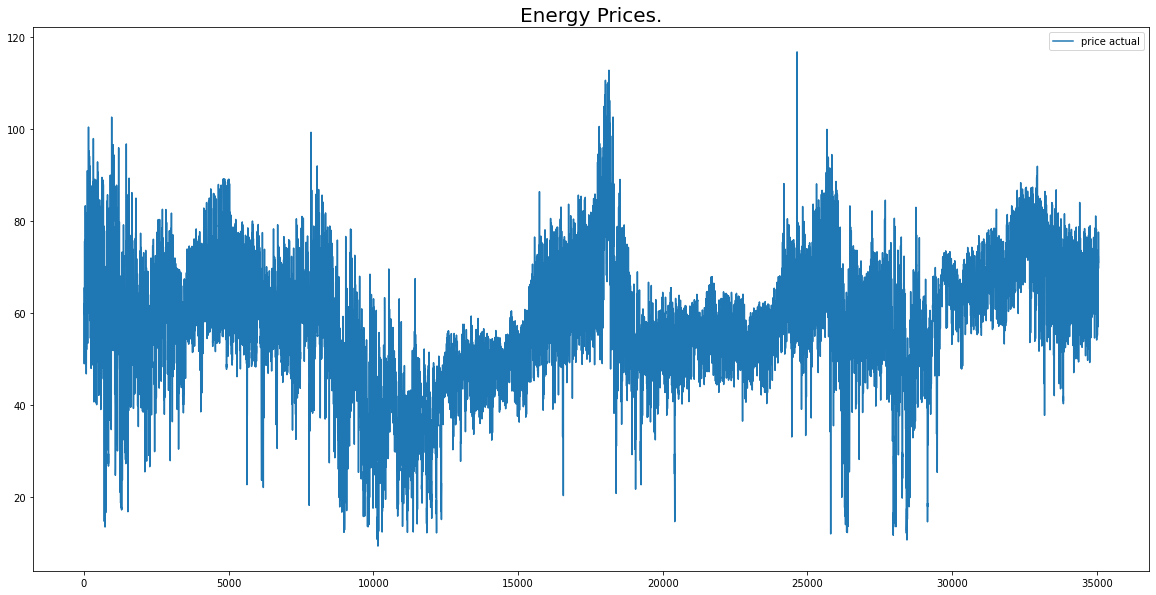

In [90]:
energy_prices_dataset[['price actual']].plot(figsize= (20, 10)) 
plt.title("Energy Prices.", fontsize = 20) 

The purpose of this code cell was just to plot the energy prices for the entire dataset. I just wanted to get a brief intuition for the general trend in energy price. 

# **2. Pre-processing of Dataset**

In [91]:
energy_prices_dataset.drop(columns = ['generation hydro pumped storage aggregated', 
                            'forecast wind offshore eday ahead'], inplace = True) #drop these columns since they are entirely empty 


energy_prices_dataset.drop(columns = ["price day ahead"], inplace = True) #drop this column since we are not interested in performing a forecast, 
#we are interested in predicting the hourly Electrical Price based on the features we are given

energy_prices_dataset.set_index("time", inplace = True)

energy_prices_dataset.interpolate(inplace = True)

# **3. Feature Engineering / Feature Learning**

[56.5086085756153, 83.82702565038878, 90.54651095282568, 95.2422032757538, 97.58093719905415, 98.70884232158153, 99.35943284405857, 99.64667140351979, 99.76954303844909, 99.84815053566942, 99.91569270888938, 99.96647368559695, 99.98943518303194, 99.9962930363085, 99.9981505757851, 99.99965428937482, 99.99991091477281, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0]


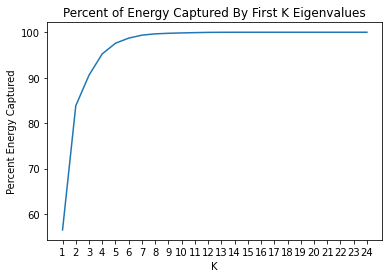

In [92]:
features = [columnName for columnName in energy_prices_dataset.columns if columnName != "price actual"]
label = ["price actual"]

X = energy_prices_dataset[features].to_numpy()
Y = energy_prices_dataset[label].to_numpy()

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=104, test_size=0.20, shuffle=True) #split data into remaining/test

datascaler = sklpp.StandardScaler(with_mean = True, with_std = False) #initialize Standard Scaler object
X_train = datascaler.fit_transform(X_train) #fit it to training data and transform
X_test = datascaler.transform(X_test) #transform test data

left_singular_vectors, singular_value_matrix, right_singular_vectors = np.linalg.svd(X_train)   #svd of centered matrix
total_energy = sum([singular_value * singular_value for singular_value in singular_value_matrix]) #total energy in centered dataset

cumulative_energy = 0   #initialize variable
k_values = [] #initialize array
percent_energy_captured = [] #initialize array
k = 0   #initialize k
for index in range(len(singular_value_matrix)):
    cumulative_energy = cumulative_energy + (singular_value_matrix[index] * singular_value_matrix[index])   #calculate energy of top k singular values
    k = k + 1   #increment k
    k_values.append(k) #append k to array
    percent_energy_captured.append((100 * cumulative_energy / total_energy)) #append percent energy captured cumulatively to the array

print(percent_energy_captured) #print percent_energy_captured

#Plot percent of energy captured by first k eigenvalues
fig, ax = plt.subplots()
ax.set_title("Percent of Energy Captured By First K Eigenvalues")
ax.set_xlabel("K")
ax.set_ylabel("Percent Energy Captured")
ax.plot(k_values, percent_energy_captured)
ax.xaxis.set_major_locator(mticker.IndexLocator( base = 1, offset = 0))  

pca = skldecomp.PCA(n_components = 6, svd_solver = 'full')  #initialize PCA object with 4 components
X_train = pca.fit_transform(X_train) #map remaining data points onto PCA subspace
X_test = pca.transform(X_test) #map test data points onto same PCA subspace


# **4. Processing The Dataset Via Machine Learning**

In [93]:
alphas_model1 = np.linspace(0.1, 100000, 100, endpoint = False) #create alphas for Ridge Regression cross validation testing

cross_validation_scores_model1 = [cross_validate(Ridge(alpha), X_train, Y_train) for alpha in alphas_model1] #compute cross validation scores for each alpha for Ridge Regression
mean_validation_scores_model1 = [data["test_score"].mean() for data in cross_validation_scores_model1] #compute mean of cross validation scores
std_validation_scores_model1 = [data["test_score"].std() for data in cross_validation_scores_model1] #compute standard deviation of cross validation scores
best_alpha_model1 = alphas_model1[np.argmax(mean_validation_scores_model1)] #determine which alphs gives us best cross validation score

print(f"Best Value of Alpha for Ridge Regression: {best_alpha_model1}") #print statement

alphas_model2 = np.linspace(0.01, 1, 100, endpoint = False) #create alphas for Ridge Regression cross validation testing
cross_validation_scores_model2 = [cross_validate(Lasso(alpha), X_train, Y_train) for alpha in alphas_model2] #compute cross validation scores for each alpha for Lasso Regression
mean_validation_scores_model2 = [data["test_score"].mean() for data in cross_validation_scores_model2] #compute mean of cross validation scores
std_validation_scores_model2 = [data["test_score"].std() for data in cross_validation_scores_model2] #compute standard deviation of cross validation scores
best_alpha_model2 = alphas_model2[np.argmax(mean_validation_scores_model2)] #determine which alphs gives us best cross validation score

print(f"Best Value of Alpha for Lasso Regression: {best_alpha_model2}") #print statement 

Best Value of Alpha for Ridge Regression: 99000.001
Best Value of Alpha for Lasso Regression: 0.01


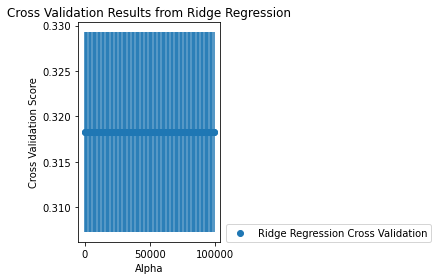

In [94]:
#Plot Cross Validation results from Ridge Regression
plt.title("Cross Validation Results from Ridge Regression")
plt.scatter(alphas_model1, mean_validation_scores_model1, label= "Ridge Regression Cross Validation")
plt.errorbar(alphas_model1, mean_validation_scores_model1, std_validation_scores_model1, fmt = "o")
plt.legend(loc = (1.04, 0))
plt.xlabel('Alpha')
plt.ylabel('Cross Validation Score')
plt.tight_layout()
plt.show()


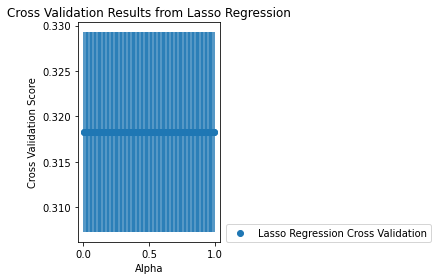

In [95]:
#Plot Cross Validation results from Lasso Regression
plt.title("Cross Validation Results from Lasso Regression")
plt.scatter(alphas_model2, mean_validation_scores_model2, label= "Lasso Regression Cross Validation")
plt.errorbar(alphas_model2, mean_validation_scores_model2, std_validation_scores_model2, fmt = "o")
plt.legend(loc = (1.04, 0))
plt.xlabel('Alpha')
plt.ylabel('Cross Validation Score')
plt.tight_layout()
plt.show()


In [96]:
start = time.time() #start time that we are beginning our training for Ridge Regression
model1 = Ridge(best_alpha_model1).fit(X_train, Y_train) #fit a Linear Regression(i.e. Ridge Regression) model to the data
end = time.time()

print("Time Elapsed to train Ridge Regression: ", end - start)


Time Elapsed to train Ridge Regression:  0.003286123275756836


In [97]:
start = time.time() #start time that we are beginning our training for Lasso Regression
model2 = Lasso(best_alpha_model2).fit(X_train, Y_train) #fit a Linear Regression(i.e. Lasso Regression) model to the data
end = time.time() 
print("Time Elapsed to Train Lasso Regression Model: ", end - start)

Time Elapsed to Train Lasso Regression Model:  0.0025861263275146484


# **5. Comparative Analysis**

In [98]:
N, P = X_test.shape #calculate number of rowx in test dataset
start = time.time()
prediction = model1.predict(X_test) #make prediction for test data
end = time.time() 
print("Time Taken to Test Ridge Regression Model: ", end - start)
r_squared_score = r2_score(Y_test, prediction) #calculate R^2 test statistic for lasso regression model
print(f"R2 Test Statistic for Ridge Regression: {r_squared_score}") #print  R^2 test statistic for lasso regression model

Time Taken to Test Ridge Regression Model:  0.001210927963256836
R2 Test Statistic for Ridge Regression: 0.32284570074741614


In [99]:
N, P = X_test.shape #calculate number of rowx in test dataset
start = time.time()
prediction = model2.predict(X_test) #make prediction for test data
end = time.time() 
print("Time Taken to Test Lasso Regression Model: ", end - start)
r_squared_score = r2_score(Y_test, prediction) #calculate R^2 test statistic for lasso regression model
print(f"R2 Test Statistic for Lasso Regression: {r_squared_score}") #print  R^2 test statistic for lasso regression model

Time Taken to Test Lasso Regression Model:  0.0010340213775634766
R2 Test Statistic for Lasso Regression: 0.32284567586274604


# **6. Discussion on Ethical Issues**

Machine learning can be a powerful tool in society to complete a variety tasks, such as prediction, and classification. While Machine learning can bring many benefits, machine learning also give rise to ethical concerns and issues. There are two main ethical issues specific to this machine learning task to predict energy prices: (1) Fairness, and (2) Safety and security. 

The accuracy of the machine learning model to predict energy prices poses a risk to the economy, energy companies and consumers. Consumers and stakeholders in energy companies can be harmed financially from such machine learning model. Such a machine learning model could create an 'unfair' space in the finanical sector the Energy industry. Energy prices are one of the most volatile assets in the world. If one could create a machine lerning model that can accurately predict energy prices, he or she would obviously have an unfair advantage over other investors. 

Not only can this machine learning model create unfairness in the financial sector, the machine learning model can also pose saftey and security risks. The Energy industry is one of the most important sector that holds society together. Without the energy sector, there will be no power, electricity, gas, etc. If there was a malicious group with the intent to cause havoc and harm society infrastructure, the group would only need to target the energy distribution centers, plants, or grid, that contributes a lot to the energy market. If the group could get there hands on such machine learning model to predict energy prices, the group would have access to unlimited information about the status and conditions of each generation plant in the dataset.

# **7. Bibliography**

https://www.kaggle.com/datasets/nicholasjhana/energy-consumption-generation-prices-and-weather